# Chap 09

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

(32, 2)


,Y1,Y2
0,9.2,2.56
1,9.8,1.99
2,9.4,2.40
3,9.2,2.27
4,8.1,3.68


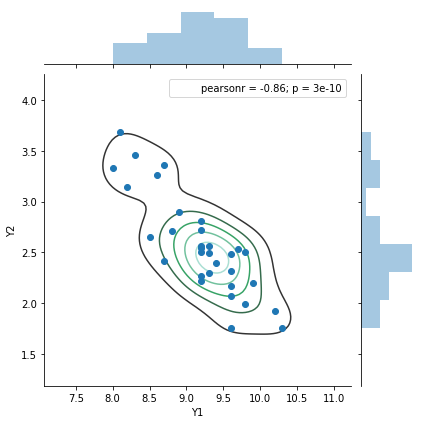

In [8]:
df = pd.read_csv('./input/data-mvn.txt')
print(df.shape)
display(df.head())
sns.jointplot(x='Y1', y='Y2', data=df).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

In [10]:
model_92 = pystan.StanModel('./model/model9-2b.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3f80daed77e834ffca696e8f0fed342a NOW.


In [17]:
stan_data = {
    'Y': df[['Y1', 'Y2']].values,
    'D': len(df.columns),
    'N': df.shape[0],
}
fit_92 = model_92.sampling(data=stan_data, seed=1234)
fit_92

Inference for Stan model: anon_model_3f80daed77e834ffca696e8f0fed342a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mn[0]      9.19  2.3e-3   0.11   8.96   9.12   9.19   9.26   9.42   2506    1.0
mn[1]      2.56  1.8e-3   0.09   2.37    2.5   2.56   2.62   2.74   2567    1.0
cov[0,0]   0.42  2.9e-3   0.12   0.25   0.34    0.4   0.48   0.72   1857    1.0
cov[1,0]   -0.3  2.2e-3   0.09  -0.52  -0.35  -0.28  -0.23  -0.17   1780    1.0
cov[0,1]   -0.3  2.2e-3   0.09  -0.52  -0.35  -0.28  -0.23  -0.17   1780    1.0
cov[1,1]   0.29  1.9e-3   0.08   0.17   0.23   0.28   0.33    0.5   1932    1.0
lp__      25.21    0.04   1.67  21.06  24.32   25.6  26.43  27.38   1544    1.0

Samples were drawn using NUTS at Sat Nov  4 16:03:04 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

In [18]:
df = pd.read_csv('./input/data-attendance-5.txt')
print(df.shape)
df.head()

(50, 5)


,A,Score,X3,X4,Y
0,0,69,-0.56,1.20,0.286
1,1,145,-0.23,0.67,0.196
2,0,125,1.56,0.98,0.261
3,1,86,0.07,1.91,0.109
4,1,158,0.13,0.97,0.230


In [19]:
model_93 = pystan.StanModel('./model/model9-3.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a1be29f08fcca34f9ea4b0ebf6c9b37b NOW.


In [38]:
X = np.hstack([np.ones((df.shape[0], 1)), df.drop('Y', axis=1).values])
X[:, 2] = X[:, 2] / 200.0
stan_data = {
    'X': X,
    'Y': df['Y'].values,
    'D': len(df.columns),
    'N': df.shape[0],
}
fit_93 = model_93.sampling(data=stan_data, seed=1234)
fit_93

Inference for Stan model: anon_model_a1be29f08fcca34f9ea4b0ebf6c9b37b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b[0]     0.14  9.7e-4   0.04   0.06   0.11   0.14   0.17   0.22   1696    1.0
b[1]    -0.14  2.3e-4   0.01  -0.17  -0.15  -0.14  -0.13  -0.11   4000    1.0
b[2]     0.32  1.3e-3   0.06   0.21   0.28   0.32   0.36   0.43   1779    1.0
b[3]  -3.2e-3  1.4e-4 8.2e-3  -0.02-8.6e-3-3.3e-3 2.4e-3   0.01   3296    1.0
b[4]    -0.01  2.4e-4   0.01  -0.04  -0.02  -0.01-3.6e-3   0.01   3060    1.0
sigma    0.05  1.0e-4 5.7e-3   0.04   0.05   0.05   0.06   0.06   2992    1.0
mu[0]    0.24  3.5e-4   0.02    0.2   0.22   0.24   0.25   0.27   2437    1.0
mu[1]    0.22  2.2e-4   0.01   0.19   0.21   0.22   0.23   0.25   4000    1.0
mu[2]    0.32  2.6e-4   0.02   0.29   0.31   0.32   0.33   0.35   3402    1.0
mu[3]    0.11  2.7e-4   0.02   

In [42]:
df = pd.read_csv('./input/data-dice.txt')
print(df.shape)
df.head()

(200, 1)


,Face
0,1
1,2
2,6
3,5
4,4


In [40]:
model_95 = pystan.StanModel('./model/model9-5.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6500ee963d115c34a012275c243bcdb4 NOW.


In [46]:
stan_data = {
    'K': df['Face'].nunique(),
    'Y': df['Face'].value_counts().sort_index(),
}
fit_95 = model_95.sampling(data=stan_data, seed=1234)
fit_95

Inference for Stan model: anon_model_6500ee963d115c34a012275c243bcdb4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]   0.11  3.5e-4   0.02   0.07   0.09   0.11   0.12   0.15   4000    1.0
theta[1]   0.37  5.3e-4   0.03   0.31   0.35   0.37   0.39   0.44   4000    1.0
theta[2]    0.1  3.4e-4   0.02   0.06   0.09    0.1   0.12   0.15   4000    1.0
theta[3]   0.25  4.9e-4   0.03   0.19   0.23   0.25   0.27   0.31   4000    1.0
theta[4]    0.1  3.3e-4   0.02   0.06   0.08    0.1   0.11   0.14   4000    1.0
theta[5]   0.07  2.9e-4   0.02   0.04   0.06   0.07   0.08   0.11   4000    1.0
lp__     -333.0    0.04   1.62 -336.9 -333.8 -332.7 -331.8 -330.9   2080    1.0

Samples were drawn using NUTS at Sat Nov  4 16:17:49 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

In [111]:
df = pd.read_csv('./input/data-conc-2-NA-wide.txt')
null_persion_ids = list(df[df.isnull().any(axis=1)]['PersonID'])
null_persion_ids

[1, 2, 3, 16]

In [112]:
df = pd.read_csv('./input/data-conc-2-NA-long.txt')
print(df.shape)
df.head()

(88, 3)


,PersonID,TimeID,Y
0,1,1,2.4
1,3,1,5.2
2,4,1,6.7
3,5,1,0.3
4,6,1,6.3


In [54]:
model_96 = pystan.StanModel('./model/model9-6.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f70b2bf34e485a4c29f179eaf51ae591 NOW.


In [55]:
stan_data = {
    'I': df.shape[0],
    'N': df['PersonID'].nunique(),
    'T': df['TimeID'].nunique(),
    'Time': [1, 2, 4, 8, 12, 24],
    'PersonID': df['PersonID'].values,
    'TimeID': df['TimeID'].values,
    'Y': df['Y'].values,
}
fit_96 = model_96.sampling(data=stan_data, seed=1234)
fit_96

Inference for Stan model: anon_model_f70b2bf34e485a4c29f179eaf51ae591.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0          2.87  1.8e-3   0.11   2.65    2.8   2.87   2.94    3.1   4000    1.0
b0         -1.18  2.4e-3   0.13  -1.47  -1.26  -1.18   -1.1  -0.93   3070    1.0
log_a[0]     2.6  2.6e-3   0.15   2.33    2.5   2.59   2.69   2.91   3238    1.0
log_a[1]    2.12  2.3e-3   0.15   1.84   2.02   2.11    2.2   2.43   4000    1.0
log_a[2]    3.27  4.0e-3    0.2   2.91   3.13   3.25   3.39    3.7   2639    1.0
log_a[3]    3.25  7.2e-4   0.05   3.16   3.23   3.25   3.28   3.34   4000    1.0
log_a[4]    2.65  1.8e-3   0.11   2.43   2.57   2.64   2.72   2.88   4000    1.0
log_a[5]    2.75  1.6e-3    0.1   2.56   2.68   2.74   2.81   2.95   4000    1.0
log_a[6]    2.69  1.5e-3   0.09   2.52   2.63   2.69   2.75   2.87   4000    1.0
l

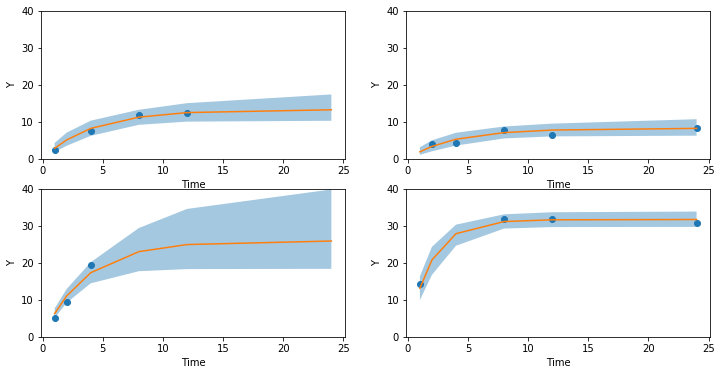

In [117]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

time = np.array([1, 2, 4, 8, 12, 24])
mu = fit_96.extract()['mu']
for i, ax_ in enumerate(ax.reshape(-1)):
    ax_.plot(df[df['PersonID'] == null_persion_ids[i]]['TimeID'].apply(lambda x: time[x-1]), df[df['PersonID'] == null_persion_ids[i]]['Y'], 'o', )
    mu_med = np.percentile(mu[:, null_persion_ids[i]-1, :], 50.0, axis=0)
    ax_.plot(time, mu_med)
    ax_.fill_between(time, np.percentile(mu[:, null_persion_ids[i]-1, :], 2.5, axis=0), np.percentile(mu[:, null_persion_ids[i]-1, :], 97.5, axis=0), alpha=0.4)
    ax_.set_ylim([0, 40])
    ax_.set_xlabel('Time')
    ax_.set_ylabel('Y')